### Introduction to Transfer Learning

In this lab, you will explore how to utilize a pre-trained model to achieve high-performance results even when working with a relatively small dataset. This technique, known as transfer learning, allows you to leverage the knowledge embedded in the trained layers of an existing model and adapt it to your specific application. Rather than training a deep neural network from scratch—a process that requires extensive computational resources and a large amount of data—you can fine-tune a pre-trained model to your needs.

The fundamental approach to transfer learning involves:
- Extracting the convolutional layers of a pre-trained model.
- Appending fully connected (dense) layers tailored to your specific task.
- Training only the newly added dense layers while keeping the convolutional layers frozen.
- Evaluating the results and fine-tuning further if needed.

By adopting transfer learning, you significantly reduce training time and improve model performance, as the pre-trained model has already learned useful feature representations from a large dataset. Instead of learning everything from scratch, you simply reuse and adapt the learned features for your dataset.

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

import logging
tf.get_logger().setLevel(logging.ERROR) 

### Preparing the Pretrained Model: InceptionV3

For this exercise, we will use InceptionV3, a powerful convolutional neural network architecture originally trained on ImageNet, as the base model. InceptionV3 is particularly effective at extracting features from images due to its deep hierarchical structure and efficient use of computational resources.

Steps to Configure the Model:
- Define the input shape: The model must accept an input shape suitable for your application. For this lab, we use 150x150x3 as the input dimensions.
- Freeze the convolutional base: Since the convolutional layers of InceptionV3 have already learned valuable features, we freeze them to retain their pre-trained weights.
- Attach a new classifier: We append a set of dense layers on top of the frozen base to tailor the model to our specific task.

In [2]:
local_weights_file = 'inception_v3_model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


# Set the input shape and remove the dense layers
pretrained_model = tf.keras.applications.inception_v3.InceptionV3(  # Loads the InceptionV3 model architecture
    input_shape=(150,150,3),  # Sets the input size for images as 150x150 pixels with 3 color channels (RGB)
    include_top=False,  # Removes the fully connected (dense) layers from the original model
    weights=None  # The model is not loaded with pre-trained weights.If we wanted pre-trained ImageNet weights, we would use weights='imagenet'
)

# This ensures that the convolutional base has pre-learned features
pretrained_model.load_weights(local_weights_file)  # Loads the weights from a previously downloaded trained model

# Loops through all layers in the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False  # Freezes the layers, meaning they will not be updated during training. This retains the knowledge already present in the pre-trained model

In [3]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

### Removing the Fully Connected Layer

To adapt InceptionV3 to our problem, we remove the fully connected (dense) output layer of the original model, which was designed for classifying 1,000 ImageNet categories. Instead, we replace it with our own set of layers that are trained on our dataset.

The base model retains its feature extraction capabilities, and we customize only the classification head. We also select an intermediate layer (e.g., mixed7) as the cutoff point. This ensures that we retain generalized feature representations while discarding layers that might be too specialized for ImageNet categories.

In [4]:
last_layer = pretrained_model.get_layer('mixed7')
last_output = last_layer.output

print('Output shape of last layer : ', last_layer.output.shape)

Output shape of last layer :  (None, 7, 7, 768)


### Adding Custom Dense Layers

Once the convolutional layers are in place, we introduce additional fully connected layers to classify the images. These layers will be responsible for learning new patterns specific to our dataset, which consists of recognizing cats and dogs.

Key components of the classifier:
- Flatten layer: Converts the 3D feature maps into a 1D vector.
- Dense layers: Fully connected layers to learn higher-level features.
- Dropout layer: Prevents overfitting by randomly deactivating a portion of neurons during training.
- Output layer: Uses a sigmoid activation function for binary classification (cats vs. dogs).

In [5]:
# last_output represents the output of the last convolutional layer
x = tf.keras.layers.Flatten()(last_output)  # Flatten() converts the feature maps from the convolutional layers into a 1D vector
x = tf.keras.layers.Dense(1024, activation='relu')(x)  # Adds a fully connected (dense) layer with 1024 neurons
x = tf.keras.layers.Dropout(0.2)(x)  # Adds a Dropout layer to randomly deactivate 20% of neurons during training for reducing overfitting
x = tf.keras.layers.Dense(1, activation='sigmoid')(x) # 1 neuron: Because it's a binary classification 



# Creates a new model by specifying:
#      pretrained_model.input: Uses InceptionV3’s input layer
#      x: The final custom dense layers
# This model will use InceptionV3 for feature extraction and train only the dense layers

model = tf.keras.Model(pretrained_model.input, x)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

### Preprocessing Input Data

Different pre-trained models require different preprocessing techniques. InceptionV3, for instance, expects input values to be scaled between -1 and 1. The TensorFlow Keras library provides a built-in method to handle this:

from tensorflow.keras.applications.inception_v3 import preprocess_input

You should apply this preprocessing function to your dataset to ensure compatibility with the model’s training regime. This is crucial for maintaining consistency and maximizing performance.

#### Preparing the dataset

In [6]:
BASE_DIR = 'cats_and_dogs_filtered'

train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Instantiate the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )

# Instantiate the validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=20,
    label_mode='binary'
    )

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [7]:
def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

train_dataset_scaled = train_dataset.map(preprocess)
validation_dataset_scaled = validation_dataset.map(preprocess)

In [8]:
# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

### Augmentation model and final model building

In [9]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.4),
    tf.keras.layers.RandomZoom(0.2)
])

In [10]:
inputs = tf.keras.Input(shape=(150,150,3))  # Defines a new input layer for the augmented model
x = data_augmentation(inputs)  # Applies data augmentation to inputs
x = model(x)  # Passes the augmented images through the previously defined model



# Creates a new model (model_with_aug) that includes:
#        Data augmentation as the first step
#        Pretrained InceptionV3 for feature extraction
#        Custom dense layers for classification
model_with_aug = tf.keras.Model(inputs, x)

In [11]:
model_with_aug.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss='binary_crossentropy', metrics=['accuracy']
)

### Model training and accuracy check

In [13]:
history = model_with_aug.fit(train_dataset_final, verbose=2, epochs=20, validation_data=validation_dataset_final)

Epoch 1/20
150/150 - 132s - loss: 0.6522 - accuracy: 0.6693 - val_loss: 0.1692 - val_accuracy: 0.9320 - 132s/epoch - 877ms/step
Epoch 2/20
150/150 - 66s - loss: 0.5357 - accuracy: 0.7437 - val_loss: 0.1431 - val_accuracy: 0.9430 - 66s/epoch - 443ms/step
Epoch 3/20
150/150 - 68s - loss: 0.5302 - accuracy: 0.7407 - val_loss: 0.2039 - val_accuracy: 0.9280 - 68s/epoch - 452ms/step
Epoch 4/20
150/150 - 67s - loss: 0.4891 - accuracy: 0.7653 - val_loss: 0.1636 - val_accuracy: 0.9490 - 67s/epoch - 450ms/step
Epoch 5/20
150/150 - 70s - loss: 0.5020 - accuracy: 0.7623 - val_loss: 0.1336 - val_accuracy: 0.9530 - 70s/epoch - 470ms/step
Epoch 6/20
150/150 - 67s - loss: 0.4692 - accuracy: 0.7743 - val_loss: 0.1659 - val_accuracy: 0.9530 - 67s/epoch - 448ms/step
Epoch 7/20
150/150 - 67s - loss: 0.4642 - accuracy: 0.7893 - val_loss: 0.1984 - val_accuracy: 0.9500 - 67s/epoch - 450ms/step
Epoch 8/20
150/150 - 69s - loss: 0.4725 - accuracy: 0.7887 - val_loss: 0.1421 - val_accuracy: 0.9660 - 69s/epoch - 4

In [14]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

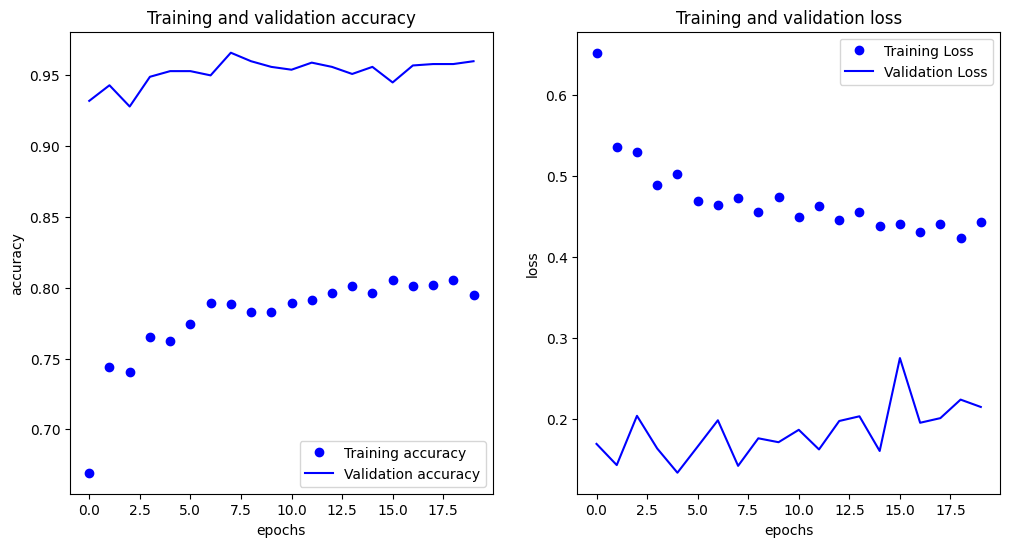

In [15]:
# Plot training results
plot_loss_acc(history)

This approach leverages transfer learning while reducing computation time and improving accuracy on small datasets.